In [3]:
# loading module 

import pandas as pd

import numpy as np

from faker import Faker

import random

import mysql.connector

from getpass import getpass # helps to securly transfer password

import streamlit as st

from datetime import datetime

from mysql.connector import connect,Error

import mysql.connector as mysql

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import datetime
# Sample categories and their items with price ranges
categories = {
    "Housing": {
        "Rent Payment": (8000, 30000),
        "Mortgage Payment": (10000, 40000),
        "Property Taxes": (1000, 5000),
        "Home Insurance": (500, 2000),
        "Home Repairs": (2000, 10000),
        "HOA Fees": (500, 3000),
        "Utilities Included": (0, 2000),
        "Home Security System": (1000, 5000),
        "Furnishings": (5000, 20000),
        "Appliance Purchases": (5000, 30000)
    },
    "Utilities": {
        "Electricity Bill": (500, 3000),
        "Water Bill": (200, 1000),
        "Gas Bill": (300, 1500),
        "Internet Service": (500, 2000),
        "Mobile Phone Bill": (300, 1500),
        "Waste Disposal Fees": (200, 500),
        "Cable TV Subscription": (500, 2000),
        "Sewer Charges": (200, 1000),
        "Home Heating Costs": (1000, 5000),
        "Maintenance Fees": (500, 2000)
    },
    "Transportation": {
        "Fuel Costs": (2000, 10000),
        "Public Transit Pass": (500, 1500),
        "Car Maintenance": (1000, 5000),
        "Car Insurance": (1000, 3000),
        "Parking Fees": (200, 1000),
        "Ride-Sharing Services": (300, 2000),
        "Vehicle Registration Fees": (500, 2000),
        "Toll Charges": (100, 500),
        "Bicycle Repairs": (200, 1000),
        "Car Loan Payment": (3000, 10000)
    },
    "Groceries": {
        "Fruits And Vegetables": (500, 2000),
        "Meat And Fish": (1000, 5000),
        "Dairy Products": (500, 2000),
        "Staple Grains": (300, 1500),
        "Snacks And Beverages": (300, 1500),
        "Cleaning Supplies": (500, 2000),
        "Frozen Foods": (300, 1500),
        "Baking Ingredients": (200, 1000),
        "Condiments And Spices": (200, 1000),
        "Organic Produce": (500, 3000)
    },
    "Dining Out": {
        "Dinner At A Restaurant": (800, 3000),
        "Lunch Takeaway": (200, 800),
        "Fast Food Meal": (150, 600),
        "Coffee Shop Visit": (100, 500),
        "Brunch With Friends": (300, 1200),
        "Special Occasion Dinner": (1000, 5000),
        "Street Food": (100, 500),
        "Buffet Meals": (500, 2000),
        "Desserts And Treats": (100, 500),
        "Beverages At Bars": (300, 1500),
        "Snacks From A Convenience Store": (100, 500)
    },
    "Subscriptions": {
        "Streaming Services": (300, 1000),
        "Digital Magazine Subscriptions": (100, 500),
        "Software Licenses": (500, 2000),
        "Gym Membership": (500, 3000),
        "Online Learning Platforms": (500, 5000),
        "Cloud Storage Services": (100, 500),
        "Meal Kit Subscriptions": (1000, 3000),
        "Gaming Subscriptions": (300, 1500),
        "Audiobook Services": (300, 1000),
        "News Websites Subscription": (200, 1000)
    },
    "Health & Fitness": {
        "Gym Membership": (500, 3000),
        "Medical Consultations": (500, 5000),
        "Health Insurance Premiums": (1000, 5000),
        "Yoga Classes": (200, 1000),
        "Nutritional Supplements": (500, 2000),
        "Physical Therapy Sessions": (500, 3000),
        "Wellness Programs": (300, 1500),
        "Health Screenings": (500, 2000),
        "Personal Training Sessions": (1000, 5000),
        "Fitness Apps": (100, 500)
    },
    "Entertainment": {
        "Movie Tickets": (200, 800),
        "Concert Tickets": (500, 3000),
        "Hobby Supplies": (200, 1500),
        "Video Games": (1000, 5000),
        "Books And E-Books": (200, 1000),
        "Board Games": (500, 2000),
        "Streaming Equipment": (1000, 5000),
        "Theater Performances": (500, 3000),
        "Art Supplies": (300, 1500),
        "Sports Events Tickets": (500, 3000)
    },
    "Clothing": {
        "Casual Wear": (500, 3000),
        "Work Attire": (1000, 5000),
        "Footwear": (500, 3000),
        "Fashion Accessories": (200, 1000),
        "Seasonal Clothing": (1000, 5000),
        "Athletic Wear": (500, 3000),
        "Formal Wear": (2000, 10000),
        "Underwear And Socks": (200, 1000),
        "Children's Apparel": (500, 3000),
        "Tailoring Services": (200, 1000)
    },
    "Travel": {
        "Airfare": (3000, 50000),
        "Hotel Accommodation": (1000, 20000),
        "Car Rentals": (1000, 5000),
        "Tour Activities": (500, 5000),
        "Travel Insurance": (500, 3000),
        "Dining While Traveling": (500, 3000),
        "Souvenirs": (200, 2000),
        "Local Transportation": (100, 1000),
        "Baggage Fees": (500, 2000),
        "Travel Accessories": (500, 5000)
    }
}

# Function to create a transaction
def create_transaction(date, category, description, amount=None):
    if amount is None:
        amount = round(random.uniform(*categories[category][description]), 2)
    payment_mode = random.choice(["Cash", "Online"])
    cashback = round(amount * random.uniform(0, 0.1), 2)  # Cashback up to 10% of the amount
    return {
        "Date": date,
        "Category": category,
        "Payment Mode": payment_mode,
        "Description": description,
        "Amount Paid": amount,
        "Cashback": cashback
    }

# Function to enforce constraints
def enforce_constraints(data, month, year):
    # One-time expenses for the month
    one_time_expenses = [
        "Internet Service", "Mobile Phone Bill", "Electricity Bill", 
        "Water Bill", "Gym Membership", "Public Transit Pass"
    ]
    for expense in one_time_expenses:
        if not any(row["Description"] == expense for row in data):
            category = "Utilities" if expense in categories["Utilities"] else "Subscriptions"
            if expense == "Public Transit Pass":
                category = "Transportation"
            data.append(create_transaction(datetime.date(year, month, 1), category, expense))

    # Magazine subscription constraints
    magazine_issues = [row for row in data if row["Description"] == "Digital Magazine Subscriptions"]
    if magazine_issues:
        issues_dates = [issue["Date"] for issue in magazine_issues]
        if any(date.day >= 10 and date.day <= 15 for date in issues_dates):
            # Ensure only one type of magazine subscription per month
            data = [row for row in data if not (row["Description"] == "Digital Magazine Subscriptions" and row["Date"].day >= 10 and row["Date"].day <= 15)]
            data.append(create_transaction(random.choice(issues_dates), "Subscriptions", "Digital Magazine Subscriptions", amount=round(random.uniform(5, 500), 2)))
        else:
            data.append(create_transaction(random.choice(issues_dates), "Subscriptions", "Digital Magazine Subscriptions", amount=round(random.uniform(50, 200), 2)))

    return data

# Function to generate monthly data
def generate_monthly_data(month, year):
    data = []
    start_date = datetime.date(year, month, 1)
    days_in_month = (datetime.date(year, month + 1, 1) - datetime.timedelta(days=1)).day if month < 12 else 31

    # Generate category-specific patterns
    for day in range(1, days_in_month + 1):
        date = start_date + datetime.timedelta(days=day - 1)  # Add random transactions
        for _ in range(random.randint(1, 5)):
            category = random.choice(list(categories.keys()))
            description = random.choice(list(categories[category].keys()))
            data.append(create_transaction(date, category, description))
        
        # Specific patterns
        if day % 7 == 0:
            data.append(create_transaction(date, "Dining Out", "Dinner At A Restaurant"))
        if day % 3 == 0:
            data.append(create_transaction(date, "Dining Out", "Coffee Shop Visit"))
    
    # Enforce constraints
    data = enforce_constraints(data, month, year)

    # Ensure exactly 100 rows of data
    if len(data) > 100:
        data = data[:100]  #100 rows
    while len(data) < 100:
        date = start_date + datetime.timedelta(days=random.randint(0, days_in_month - 1))
        category = random.choice(list(categories.keys()))
        description = random.choice(list(categories[category].keys()))
        data.append(create_transaction(date, category, description))

    # Sort by date
    data = sorted(data, key=lambda x: x["Date"])
    return pd.DataFrame(data)

# Generate and save data for 12 months
def generate_yearly_data(year):
    for month in range(1, 13):
        monthly_data = generate_monthly_data(month, year)
        monthly_data.to_csv(f'monthly_data_{year}_{month}.csv', index=False)

# Execute
generate_yearly_data(2023)

In [5]:
# List of CSV files to combine for each month from January to December
csv_files = [
    'monthly_data_2023_1.csv',
    'monthly_data_2023_2.csv',
    'monthly_data_2023_3.csv',
    'monthly_data_2023_4.csv',
    'monthly_data_2023_5.csv',
    'monthly_data_2023_6.csv',
    'monthly_data_2023_7.csv',
    'monthly_data_2023_8.csv',
    'monthly_data_2023_9.csv',
    'monthly_data_2023_10.csv',
    'monthly_data_2023_11.csv',
    'monthly_data_2023_12.csv'
]

# Read and concatenate all specified CSV files into a single DataFrame
combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

print("All monthly data for the year 2023 has been combined into 'combined_data.csv'.")

All monthly data for the year 2023 has been combined into 'combined_data.csv'.


### Performing EDA For Combine_Data.

### Loading The Dataset.

In [6]:
df = pd.read_csv('combined_data.csv')

In [7]:
# seeing the top 5 rows

df.head()

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
0,2023-01-01,Travel,Cash,Travel Accessories,4506.07,372.80
1,2023-01-01,Housing,Cash,Rent Payment,25373.25,560.91
2,2023-01-01,Housing,Cash,Rent Payment,28213.24,2515.07
3,2023-01-01,Groceries,Cash,Baking Ingredients,958.51,91.15
4,2023-01-01,Clothing,Cash,Children's Apparel,990.82,80.66


In [8]:
# For Displaying Last Five Rows.

df.tail()

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
1195,2023-12-28,Utilities,Cash,Gas Bill,1139.09,68.52
1196,2023-12-28,Dining Out,Online,Dinner At A Restaurant,2043.76,17.45
1197,2023-12-29,Health & Fitness,Cash,Health Screenings,1599.59,113.36
1198,2023-12-29,Groceries,Online,Organic Produce,1545.60,48.16
1199,2023-12-29,Subscriptions,Online,Streaming Services,404.93,3.95


In [9]:
# For Displaying No Of Rows & Columns In Our Data.

df.shape

(1200, 6)

### Statistical Insight.

- This Step Is Performed For Getting Details About Various Details Like Count,Mean,Std(Standard Deviation),Min,Max,Median.

In [10]:
df.describe()

,Amount Paid,Cashback
count,1200.000000,1200.000000
mean,2323.187367,116.228675
std,4334.485286,273.096039
min,47.380000,0.040000
25%,506.122500,16.990000
50%,1065.610000,45.805000
75%,2373.770000,108.955000
max,48203.920000,3665.800000


### Data Cleaning.

- This Step Is The Most Importand Step In EDA Involving Removing Duplicate Rows/Columns,
Filling The Void Entries With Values Like Mean/Median Of The Data,Dropping Various Values,
Removing Null Entries.

### Checking Null Entries.

In [11]:
# It Gives The Number Of Missing Values For Each Variable.


df.isnull().sum()

Date            0
Category        0
Payment Mode    0
Description     0
Amount Paid     0
Cashback        0
dtype: int64

### Checking Duplicates.

In [12]:
# Returning Total Number Of Duplicates Entries.

df.duplicated().sum()

np.int64(0)

### Checking Data Type For Each Column.

In [13]:
# It Will Give The Data Type For Each Column.

df.dtypes

Date             object
Category         object
Payment Mode     object
Description      object
Amount Paid     float64
Cashback        float64
dtype: object

### Data Visualization.

1. Bar Chart

In [14]:
# Set The Style For Seaborn

sns.set_style(style='whitegrid')

### 1. Total Spending By Category.


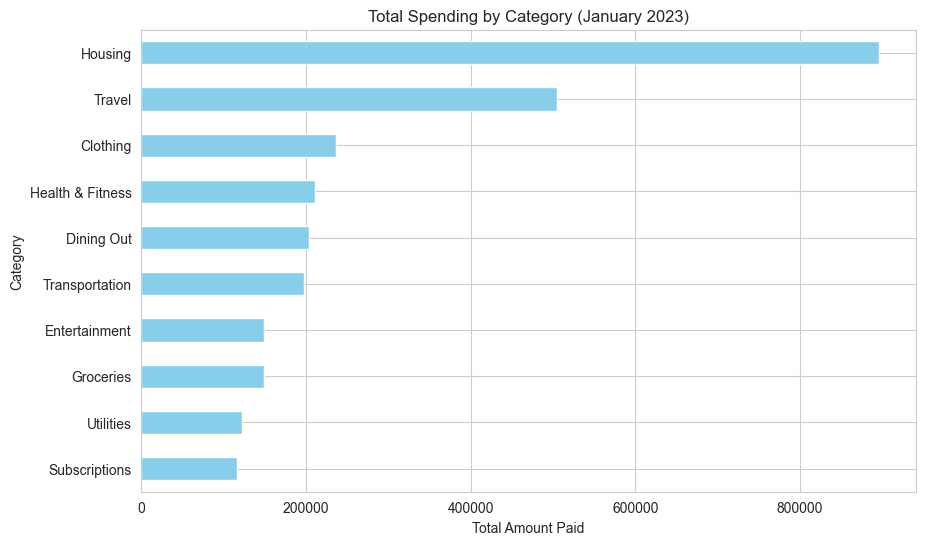

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

category_totals = df.groupby('Category')['Amount Paid'].sum().sort_values()

category_totals.plot(kind='barh', color='skyblue')

plt.title('Total Spending by Category (January 2023)')

plt.xlabel('Total Amount Paid')

plt.ylabel('Category')

plt.show()

### 2. Spending By Payment Mode.

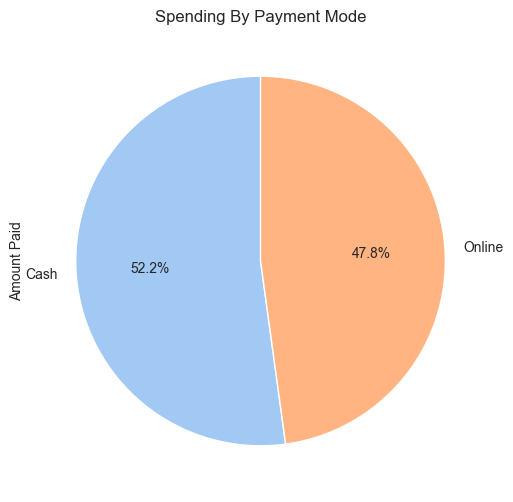

In [18]:
plt.figure(figsize=(12,6))

payment_mode_spending =df.groupby('Payment Mode')['Amount Paid'].sum()

payment_mode_spending.plot(kind='pie', autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette("pastel"))

plt.title('Spending By Payment Mode')

plt.show()

### Spending Over Time.

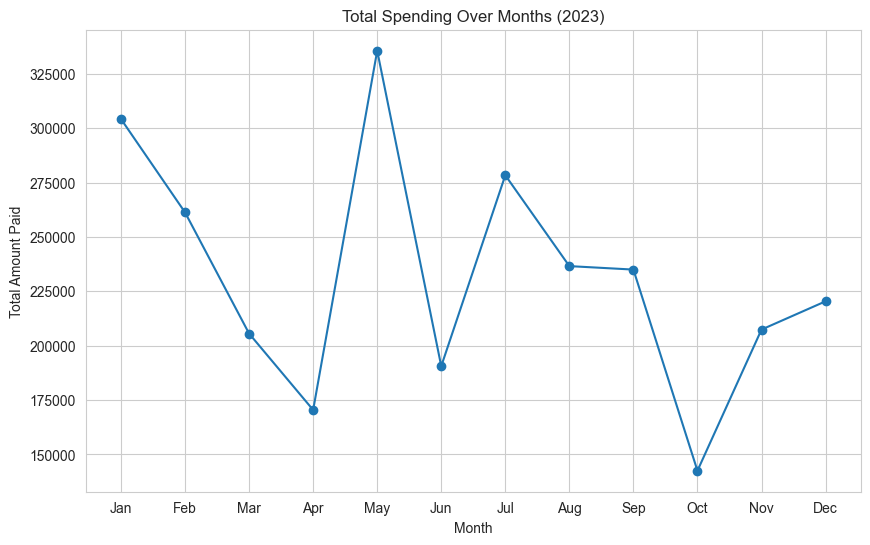

In [19]:
# Calculate total spending for each month using a list comprehension
monthly_data = [pd.read_csv(f'monthly_data_2023_{month}.csv')['Amount Paid'].sum() for month in range(1, 13)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), monthly_data, marker='o')
plt.title('Total Spending Over Months (2023)')
plt.xlabel('Month')
plt.ylabel('Total Amount Paid')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Spending By Category Over Time.

<Figure size 1200x600 with 0 Axes>

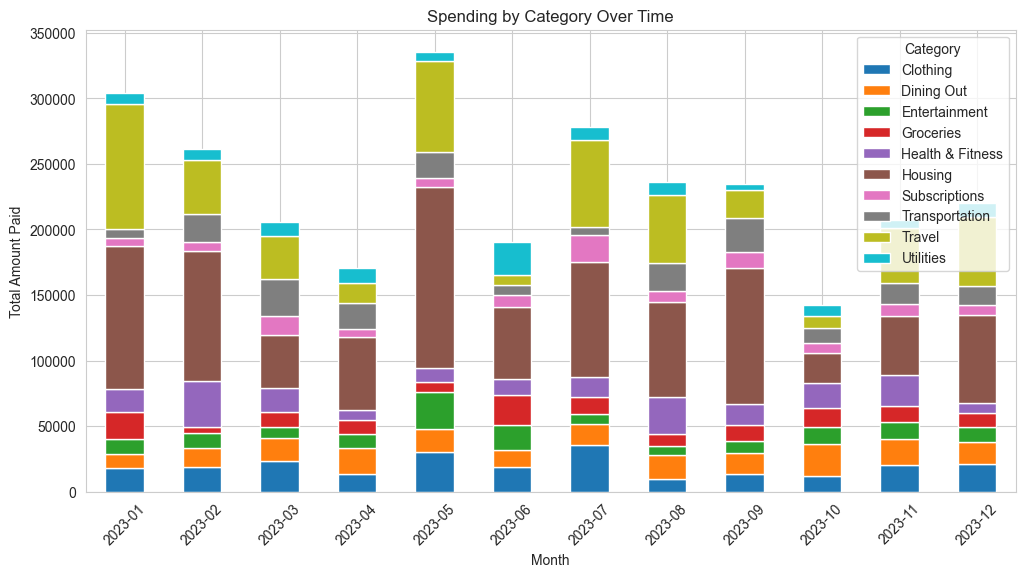

In [20]:
plt.figure(figsize=(12, 6))

category_monthly_spending = df.groupby([df['Date'].str[:7], 'Category'])['Amount Paid'].sum().unstack()

category_monthly_spending.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Spending by Category Over Time')

plt.xlabel('Month')

plt.ylabel('Total Amount Paid')

plt.xticks(rotation=45)

plt.legend(title='Category')

plt.show()